In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from datetime import datetime
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
sample_submission = pd.read_csv('https://raw.githubusercontent.com/Laxminarayen/Inceptez-Batch-17/main/Day%206%20Bigmart%20Sales%20prediction/sample_submission_8RXa3c6.csv')

In [4]:
#Have a look at the sample submission
sample_submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


In [5]:
# get the train and test dataset
train = pd.read_csv('https://raw.githubusercontent.com/Laxminarayen/Inceptez-Batch-17/main/Day%206%20Bigmart%20Sales%20prediction/train_v9rqX0R.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Laxminarayen/Inceptez-Batch-17/main/Day%206%20Bigmart%20Sales%20prediction/test_AbJTz2l.csv')


In [6]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [8]:
#find if there is any difference in columns between the datasets
train.columns.difference(test.columns)

Index(['Item_Outlet_Sales'], dtype='object')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [12]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [13]:
#add a column called 'Source' to both the datasets
train['source'] = 'train'
test['source'] = 'test'

In [14]:
train[:3]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train


In [15]:
test[:3]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
2,NCN55,14.60,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test


In [16]:
#concatenate both train & test dataset into one
df = pd.concat([train,test])
df[:3]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train


In [17]:
df.loc[df['source'] == 'train'][:3]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
 13  Item_Identifier_3          14204 non-null  obje

In [18]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [19]:
#fetch numerical and categorical columns separately.
numerical_columns = df.select_dtypes(include=np.number).drop(columns = ['Outlet_Establishment_Year','Item_Outlet_Sales'])
categorical_columns = df.select_dtypes(exclude = np.number).columns

In [20]:
#find the unique values in categorical columns
df[categorical_columns].apply(lambda x : x.nunique())

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
source                     2
dtype: int64

In [21]:
#fetch the value counts of each categorical column
df[categorical_columns].apply(lambda x: print(x.value_counts()))

DRJ47    10
FDP38    10
NCN14    10
FDW56    10
FDW16    10
         ..
FDM10     7
NCL42     7
FDM50     7
FDM52     7
FDO33     7
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
OUT027    1559
OUT013    1553
OUT035    1550
OUT049    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64
Med

Item_Identifier         None
Item_Fat_Content        None
Item_Type               None
Outlet_Identifier       None
Outlet_Size             None
Outlet_Location_Type    None
Outlet_Type             None
source                  None
dtype: object

In [22]:
# compare the Item_Identifier values and see if we can group them together and minimize the cardinality
df['Item_Identifier_3'] = df['Item_Identifier'].apply(lambda x: x[0:3])
df['Item_Identifier_2'] = df['Item_Identifier'].apply(lambda x: x[0:2])

In [23]:
df['Item_Identifier_3'].value_counts().tail(10)

DRC    73
DRM    72
DRN    53
DRB    44
DRA    29
DRO    27
DRP    19
DRZ    18
DRQ     9
DRY     9
Name: Item_Identifier_3, dtype: int64

In [24]:
#we have minimized the cardinality
df['Item_Identifier_2'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Identifier_2, dtype: int64

In [25]:
df.groupby(by=['Item_Identifier_2','Item_Type'])['Item_Identifier'].count()

Item_Identifier_2  Item_Type            
DR                 Dairy                     229
                   Hard Drinks               362
                   Soft Drinks               726
FD                 Baking Goods             1086
                   Breads                    416
                   Breakfast                 186
                   Canned                   1084
                   Dairy                     907
                   Frozen Foods             1426
                   Fruits and Vegetables    2013
                   Meat                      736
                   Seafood                    89
                   Snack Foods              1989
                   Starchy Foods             269
NC                 Health and Hygiene        858
                   Household                1548
                   Others                    280
Name: Item_Identifier, dtype: int64

In [26]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [27]:
#replacing multiple names with a standard value
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({"LF":'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [28]:
#we have minimized the cardinality of Item_Fat_Content
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [29]:
train.groupby(['Outlet_Type','Outlet_Size'])['Item_Outlet_Sales'].mean()

Outlet_Type        Outlet_Size
Grocery Store      Small           340.329723
Supermarket Type1  High           2298.995256
                   Medium         2348.354635
                   Small          2358.343066
Supermarket Type2  Medium         1995.498739
Supermarket Type3  Medium         3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [30]:
train.groupby(['Outlet_Size'])['Item_Outlet_Sales'].mean()

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [31]:
df.groupby(['Item_Identifier_2','Item_Fat_Content']).count()

Item_Identifier  Item_Weight  \
Item_Identifier_2 Item_Fat_Content                                 
DR                Low Fat                      1208         1006   
                  Regular                       109           91   
FD                Low Fat                      5291         4378   
                  Regular                      4910         4067   
NC                Low Fat                      2686         2223   

                                    Item_Visibility  Item_Type  Item_MRP  \
Item_Identifier_2 Item_Fat_Content                                         
DR                Low Fat                      1208       1208      1208   
                  Regular                       109        109       109   
FD                Low Fat                      5291       5291      5291   
                  Regular                      4910       4910      4910   
NC                Low Fat                      2686       2686      2686   

                                    Outlet_Identifier  \
Item_Identifier_2 Item_Fat_Content                      
DR                Low Fat                        1208   
                  Regular                         109   
FD                Low Fat                        5291   
                  Regular                        4910   
NC                Low Fat                        2686   

                                    Outlet_Establishment_Year  Outlet_Size  \
Item_Identifier_2 Item_Fat_Content                                           
DR                Low Fat                                1208          863   
                  Regular                                 109           78   
FD                Low Fat                                5291         3803   
                  Regular                                4910         3520   
NC                Low Fat                                2686         1924   

                                    Outlet_Location_Type  Outlet_Type  \
Item_Identifier_2 Item_Fat_Content                                      
DR                Low Fat                           1208         1208   
                  Regular                            109          109   
FD                Low Fat                           5291         5291   
                  Regular                           4910         4910   
NC                Low Fat                           2686         2686   

                                    Item_Outlet_Sales  source  \
Item_Identifier_2 Item_Fat_Content                              
DR                Low Fat                         728    1208   
                  Regular                          71     109   
FD                Low Fat                        3190    5291   
                  Regular                        2935    4910   
NC                Low Fat                        1599    2686   

                                    Item_Identifier_3  
Item_Identifier_2 Item_Fat_Content                     
DR                Low Fat                        1208  
                  Regular                         109  
FD                Low Fat                        5291  
                  Regular                        4910  
NC                Low Fat                        2686

In [32]:
#Numerical Observations
numerical_columns = numerical_columns.columns

In [33]:
df[numerical_columns].isna().sum()

Item_Weight        2439
Item_Visibility       0
Item_MRP              0
dtype: int64

<AxesSubplot:>

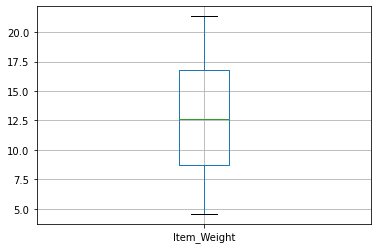

In [34]:
#NO OUTLIERS FOUND
df.boxplot(column = 'Item_Weight')

In [42]:
df.groupby(['Item_Type'])['Item_Weight'].mean()

Item_Type
Baking Goods             12.275211
Breads                   11.152362
Breakfast                13.179112
Canned                   12.340830
Dairy                    13.238358
Frozen Foods             12.569323
Fruits and Vegetables    13.194406
Hard Drinks              11.576205
Health and Hygiene       13.171739
Household                13.337977
Meat                     12.766104
Others                   13.915724
Seafood                  12.760274
Snack Foods              12.865732
Soft Drinks              11.788408
Starchy Foods            13.659758
Name: Item_Weight, dtype: float64

In [43]:
df.groupby(['Item_Identifier_2'])['Item_Weight'].mean()

Item_Identifier_2
DR    12.116645
FD    12.735577
NC    13.344139
Name: Item_Weight, dtype: float64

In [44]:
#FILL THE NULL VALUES WITH THE MEAN VALUE
df['Item_Weight'] = df.groupby('Item_Identifier_2').Item_Weight.transform(lambda x: x.fillna(x.mean()))

In [45]:
df[categorical_columns].isna().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             4016
Outlet_Location_Type       0
Outlet_Type                0
source                     0
dtype: int64

In [46]:
df[numerical_columns].isna().sum()

Item_Weight        0
Item_Visibility    0
Item_MRP           0
dtype: int64

In [47]:
#we had few Item visibility as 0 so replaced them with null and then replaced those null 
#values with mean.(an item visibility cannot be 0 and hence we have used this measure.)
df.loc[df['Item_Visibility']==0.000000,'Item_Visibility'] = np.nan
df['Item_Visibility'] = df.groupby('Item_Identifier_2').Item_Visibility.transform(lambda x: x.fillna(x.mean()))
df['Item_Visibility'].describe()

count    14204.000000
mean         0.070305
std          0.048601
min          0.003575
25%          0.033143
50%          0.062099
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [48]:
#filling the null values of categorical column with mode value
df['Outlet_Size'] = df.groupby(by = ['Outlet_Type']).Outlet_Size.transform(lambda x: x.fillna(x.mode()[0]))
train = df.loc[df['source']=='train']
test = df.loc[df['source']=='test']
train.shape

(8523, 15)

In [49]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
Item_Identifier_3               0
Item_Identifier_2               0
dtype: int64

<AxesSubplot:>

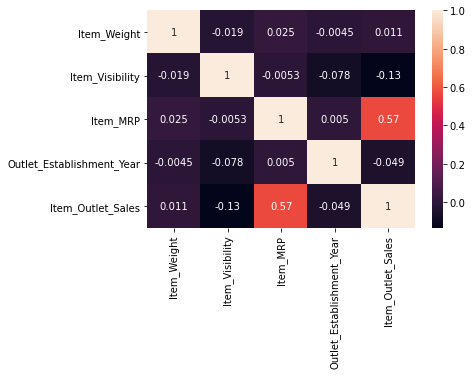

In [50]:
corr_ = train.corr()
sns.heatmap(corr_,annot = True)

In [51]:
X = train.select_dtypes(include=np.number).drop(columns = 'Item_Outlet_Sales')
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data

,features
0,Item_Weight
1,Item_Visibility
2,Item_MRP
3,Outlet_Establishment_Year


In [52]:
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,features,VIF
0,Item_Weight,10.240523
1,Item_Visibility,3.088807
2,Item_MRP,6.130512
3,Outlet_Establishment_Year,17.297057


In [53]:
#converting year value as age
df['Out_age'] = 2013 - df['Outlet_Establishment_Year']
df.drop(columns = ['Outlet_Establishment_Year'],inplace = True)
df.drop(columns = ['Outlet_Size'],inplace = True)
df.drop(columns = ['Item_Identifier_3'],inplace=True)
train = df.loc[df['source']=='train']
test = df.loc[df['source']=='test']


train.drop(columns = ['source'],inplace = True)
test.drop(columns = ['source'],inplace = True)


X = train.select_dtypes(include=np.number).drop(columns = 'Item_Outlet_Sales')
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
#calculating Variance Inflation Factor
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,features,VIF
0,Item_Weight,5.676698
1,Item_Visibility,2.818615
2,Item_MRP,4.656593
3,Out_age,3.696189


In [54]:
df_numbers = df.select_dtypes(include=np.number)
df_categories = df.select_dtypes(exclude = np.number).drop(columns = ['Outlet_Identifier','Item_Identifier','source'])
#encode the categorical columns
df_categories_encoded = pd.get_dummies(df_categories)
df_final = pd.concat([df_numbers,df_categories_encoded,df[['Outlet_Identifier','Item_Identifier','source']]],axis = 1)
df_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Out_age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_2_DR,Item_Identifier_2_FD,Item_Identifier_2_NC,Outlet_Identifier,Item_Identifier,source
0,9.30,0.016047,249.8092,3735.1380,14,1,0,0,0,0,...,0,1,0,0,0,1,0,OUT049,FDA15,train
1,5.92,0.019278,48.2692,443.4228,4,0,1,0,0,0,...,0,0,1,0,1,0,0,OUT018,DRC01,train
2,17.50,0.016760,141.6180,2097.2700,14,1,0,0,0,0,...,0,1,0,0,0,1,0,OUT049,FDN15,train
3,19.20,0.072558,182.0950,732.3800,15,0,1,0,0,0,...,1,0,0,0,0,1,0,OUT010,FDX07,train
4,8.93,0.062099,53.8614,994.7052,26,1,0,0,0,0,...,0,1,0,0,0,0,1,OUT013,NCD19,train


In [61]:
#export the preprocessed data
df_final.to_excel("Bigmart_Pre_processed_data_FINAL.xlsx",index = False)

In [58]:
df_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Out_age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_2_DR,Item_Identifier_2_FD,Item_Identifier_2_NC,Outlet_Identifier,Item_Identifier,source
0,9.30,0.016047,249.8092,3735.1380,14,1,0,0,0,0,...,0,1,0,0,0,1,0,OUT049,FDA15,train
1,5.92,0.019278,48.2692,443.4228,4,0,1,0,0,0,...,0,0,1,0,1,0,0,OUT018,DRC01,train
2,17.50,0.016760,141.6180,2097.2700,14,1,0,0,0,0,...,0,1,0,0,0,1,0,OUT049,FDN15,train
3,19.20,0.072558,182.0950,732.3800,15,0,1,0,0,0,...,1,0,0,0,0,1,0,OUT010,FDX07,train
4,8.93,0.062099,53.8614,994.7052,26,1,0,0,0,0,...,0,1,0,0,0,0,1,OUT013,NCD19,train
